<a href="https://colab.research.google.com/github/kavinponnusamy01/Healthcare-/blob/main/Healthcare_Patient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Healthcare Patient Risk Analysis – AIML***



In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")
def load_healthcare_data():
    np.random.seed(42)
    n_samples = 1000

    data = {
        'Name': [f'Patient_{i}' for i in range(n_samples)],
        'Age': np.random.randint(18, 85, n_samples),
        'Gender': np.random.choice(['Male', 'Female'], n_samples),
        'Blood_Type': np.random.choice(['A+', 'A-', 'B+', 'B-', 'AB+', 'AB-', 'O+', 'O-'], n_samples),
        'Medical_Condition': np.random.choice(['Arthritis', 'Asthma', 'Cancer', 'Diabetes', 'Hypertension', 'Obesity'], n_samples),
        'Date_of_Admission': pd.date_range('2019-01-01', periods=n_samples, freq='D'),
        'Doctor': [f'Dr_{i}' for i in np.random.randint(1, 50, n_samples)],
        'Hospital': [f'Hospital_{i}' for i in np.random.randint(1, 20, n_samples)],
        'Insurance_Provider': np.random.choice(['Aetna', 'Blue Cross', 'Cigna', 'Medicare', 'UnitedHealthcare'], n_samples),
        'Billing_Amount': np.random.normal(25000, 15000, n_samples),
        'Room_Number': np.random.randint(100, 500, n_samples),
        'Admission_Type': np.random.choice(['Emergency', 'Urgent', 'Elective'], n_samples, p=[0.4, 0.35, 0.25]),
        'Discharge_Date': pd.date_range('2019-01-05', periods=n_samples, freq='D'),
        'Medication': np.random.choice(['Paracetamol', 'Penicillin', 'Ibuprofen', 'Lipitor', 'Aspirin'], n_samples, p=[0.3, 0.2, 0.2, 0.15, 0.15]),
        'Test_Results': np.random.choice(['Normal', 'Abnormal', 'Inconclusive'], n_samples, p=[0.4, 0.35, 0.25])
    }

    data['Billing_Amount'] = np.where(np.random.random(n_samples) < 0.05,
                                    data['Billing_Amount'] * 3, data['Billing_Amount'])
    data['Billing_Amount'] = np.where(np.random.random(n_samples) < 0.03,
                                    data['Billing_Amount'] * 0.1, data['Billing_Amount'])

    df = pd.DataFrame(data)
    df['Billing_Amount'] = np.abs(df['Billing_Amount'])
    return df
df = load_healthcare_data()
print("Dataset Overview:")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

Dataset Overview:
Shape: (1000, 15)

First 5 rows:
        Name  Age  Gender Blood_Type Medical_Condition Date_of_Admission  \
0  Patient_0   69    Male        AB+          Diabetes        2019-01-01   
1  Patient_1   32  Female         B-          Diabetes        2019-01-02   
2  Patient_2   78  Female         O-            Cancer        2019-01-03   
3  Patient_3   38  Female         A-         Arthritis        2019-01-04   
4  Patient_4   41    Male         A-           Obesity        2019-01-05   

  Doctor     Hospital Insurance_Provider  Billing_Amount  Room_Number  \
0  Dr_30   Hospital_3           Medicare    26587.935971          162   
1   Dr_4  Hospital_10           Medicare    37370.010016          274   
2  Dr_13   Hospital_8         Blue Cross    15959.921732          381   
3  Dr_23  Hospital_15              Cigna     1249.828232          392   
4   Dr_8  Hospital_10   UnitedHealthcare    41831.353455          325   

  Admission_Type Discharge_Date   Medication  Test_Re

TASK 1 - EXPLORATORY DATA ANALYSIS


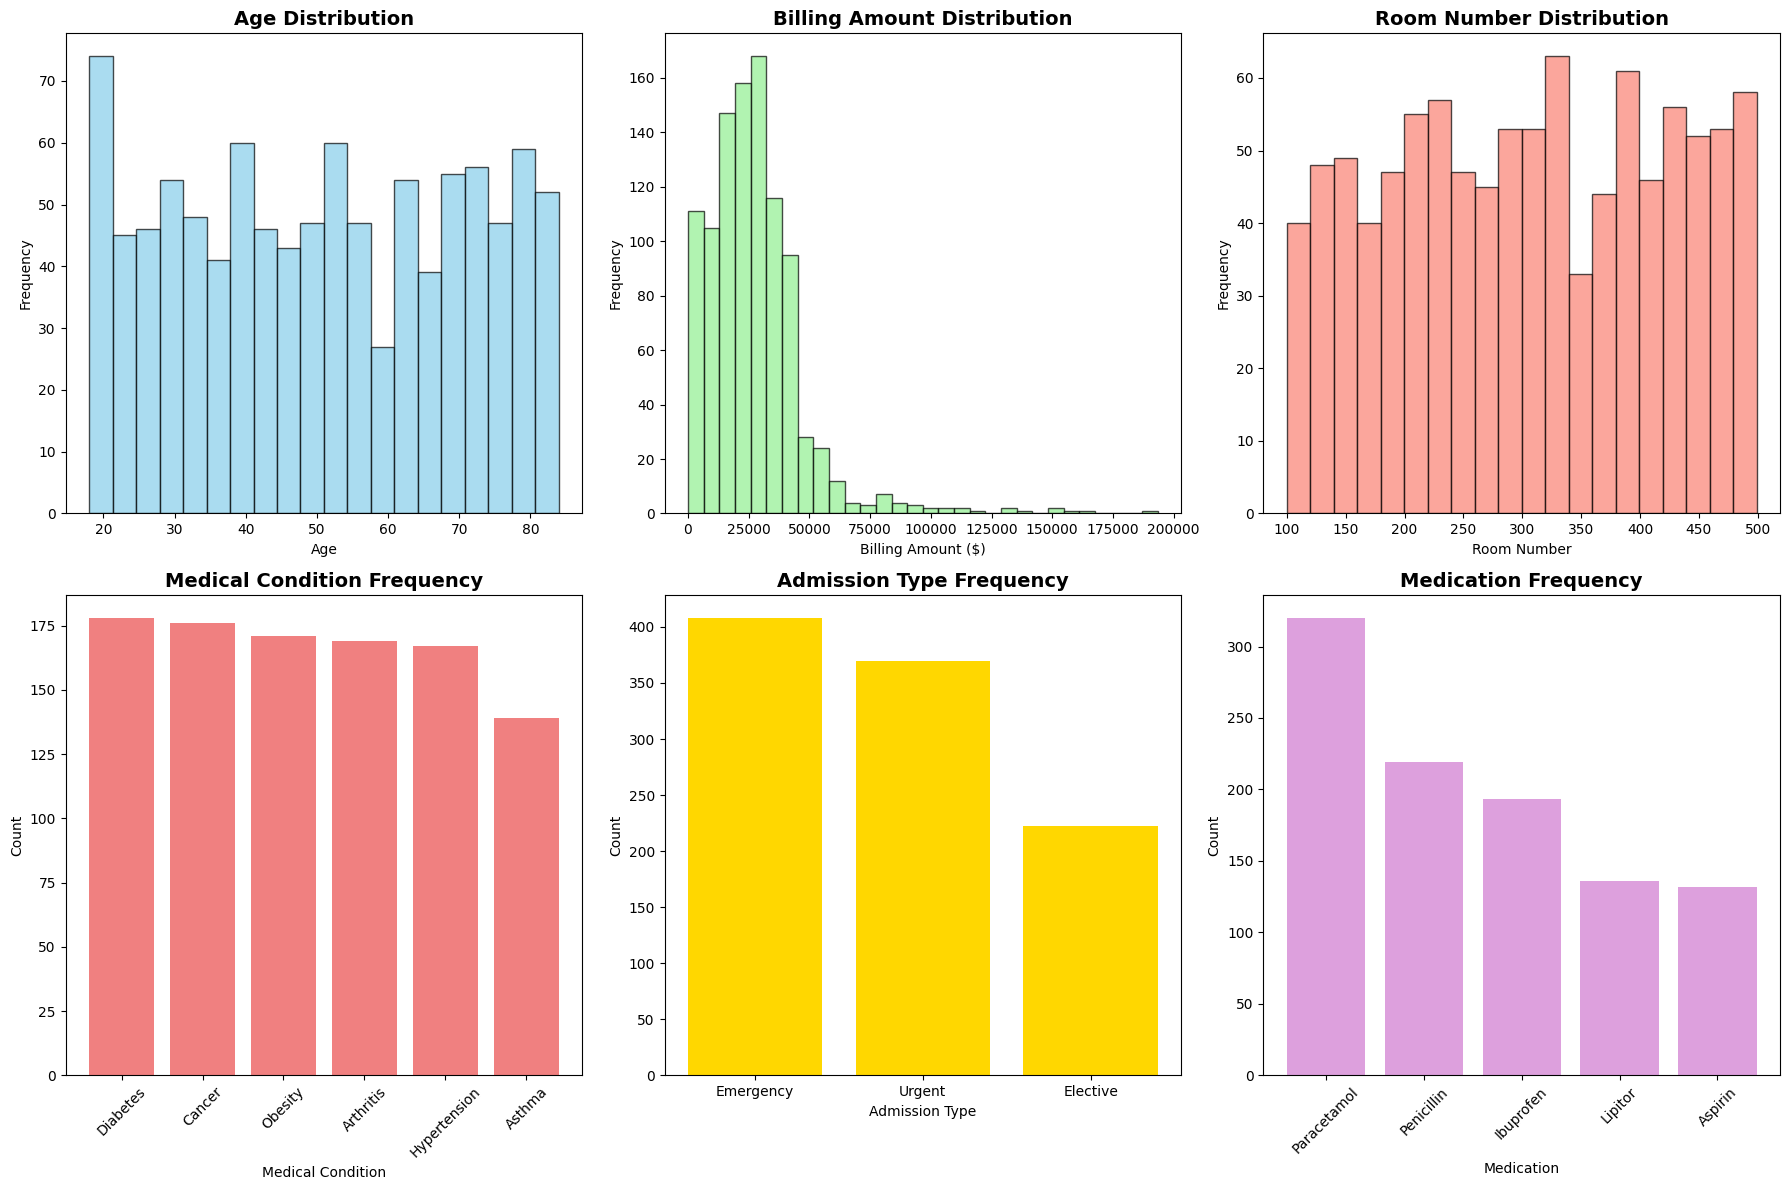


Summary Statistics:
Age - Mean: 50.7, Std: 19.8
Billing Amount - Mean: $27242.19, Std: $20722.70
Room Number - Mean: 305.6, Std: 115.3


In [ ]:

print("="*50)
print("TASK 1 - EXPLORATORY DATA ANALYSIS")
print("="*50)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Age Distribution
axes[0,0].hist(df['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0,0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')

# 2. Billing Amount Distribution
axes[0,1].hist(df['Billing_Amount'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0,1].set_title('Billing Amount Distribution', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Billing Amount ($)')
axes[0,1].set_ylabel('Frequency')

# 3. Room Number Distribution
axes[0,2].hist(df['Room_Number'], bins=20, color='salmon', edgecolor='black', alpha=0.7)
axes[0,2].set_title('Room Number Distribution', fontsize=14, fontweight='bold')
axes[0,2].set_xlabel('Room Number')
axes[0,2].set_ylabel('Frequency')

# 4. Medical Condition Frequency
condition_counts = df['Medical_Condition'].value_counts()
axes[1,0].bar(condition_counts.index, condition_counts.values, color='lightcoral')
axes[1,0].set_title('Medical Condition Frequency', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Medical Condition')
axes[1,0].set_ylabel('Count')
plt.setp(axes[1,0].xaxis.get_majorticklabels(), rotation=45)

# 5. Admission Type Frequency
admission_counts = df['Admission_Type'].value_counts()
axes[1,1].bar(admission_counts.index, admission_counts.values, color='gold')
axes[1,1].set_title('Admission Type Frequency', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Admission Type')
axes[1,1].set_ylabel('Count')

# 6. Medication Frequency
medication_counts = df['Medication'].value_counts()
axes[1,2].bar(medication_counts.index, medication_counts.values, color='plum')
axes[1,2].set_title('Medication Frequency', fontsize=14, fontweight='bold')
axes[1,2].set_xlabel('Medication')
axes[1,2].set_ylabel('Count')
plt.setp(axes[1,2].xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()
print("\nSummary Statistics:")
print(f"Age - Mean: {df['Age'].mean():.1f}, Std: {df['Age'].std():.1f}")
print(f"Billing Amount - Mean: ${df['Billing_Amount'].mean():.2f}, Std: ${df['Billing_Amount'].std():.2f}")
print(f"Room Number - Mean: {df['Room_Number'].mean():.1f}, Std: {df['Room_Number'].std():.1f}")

TASK 1 - EXPLORATORY DATA ANALYSIS


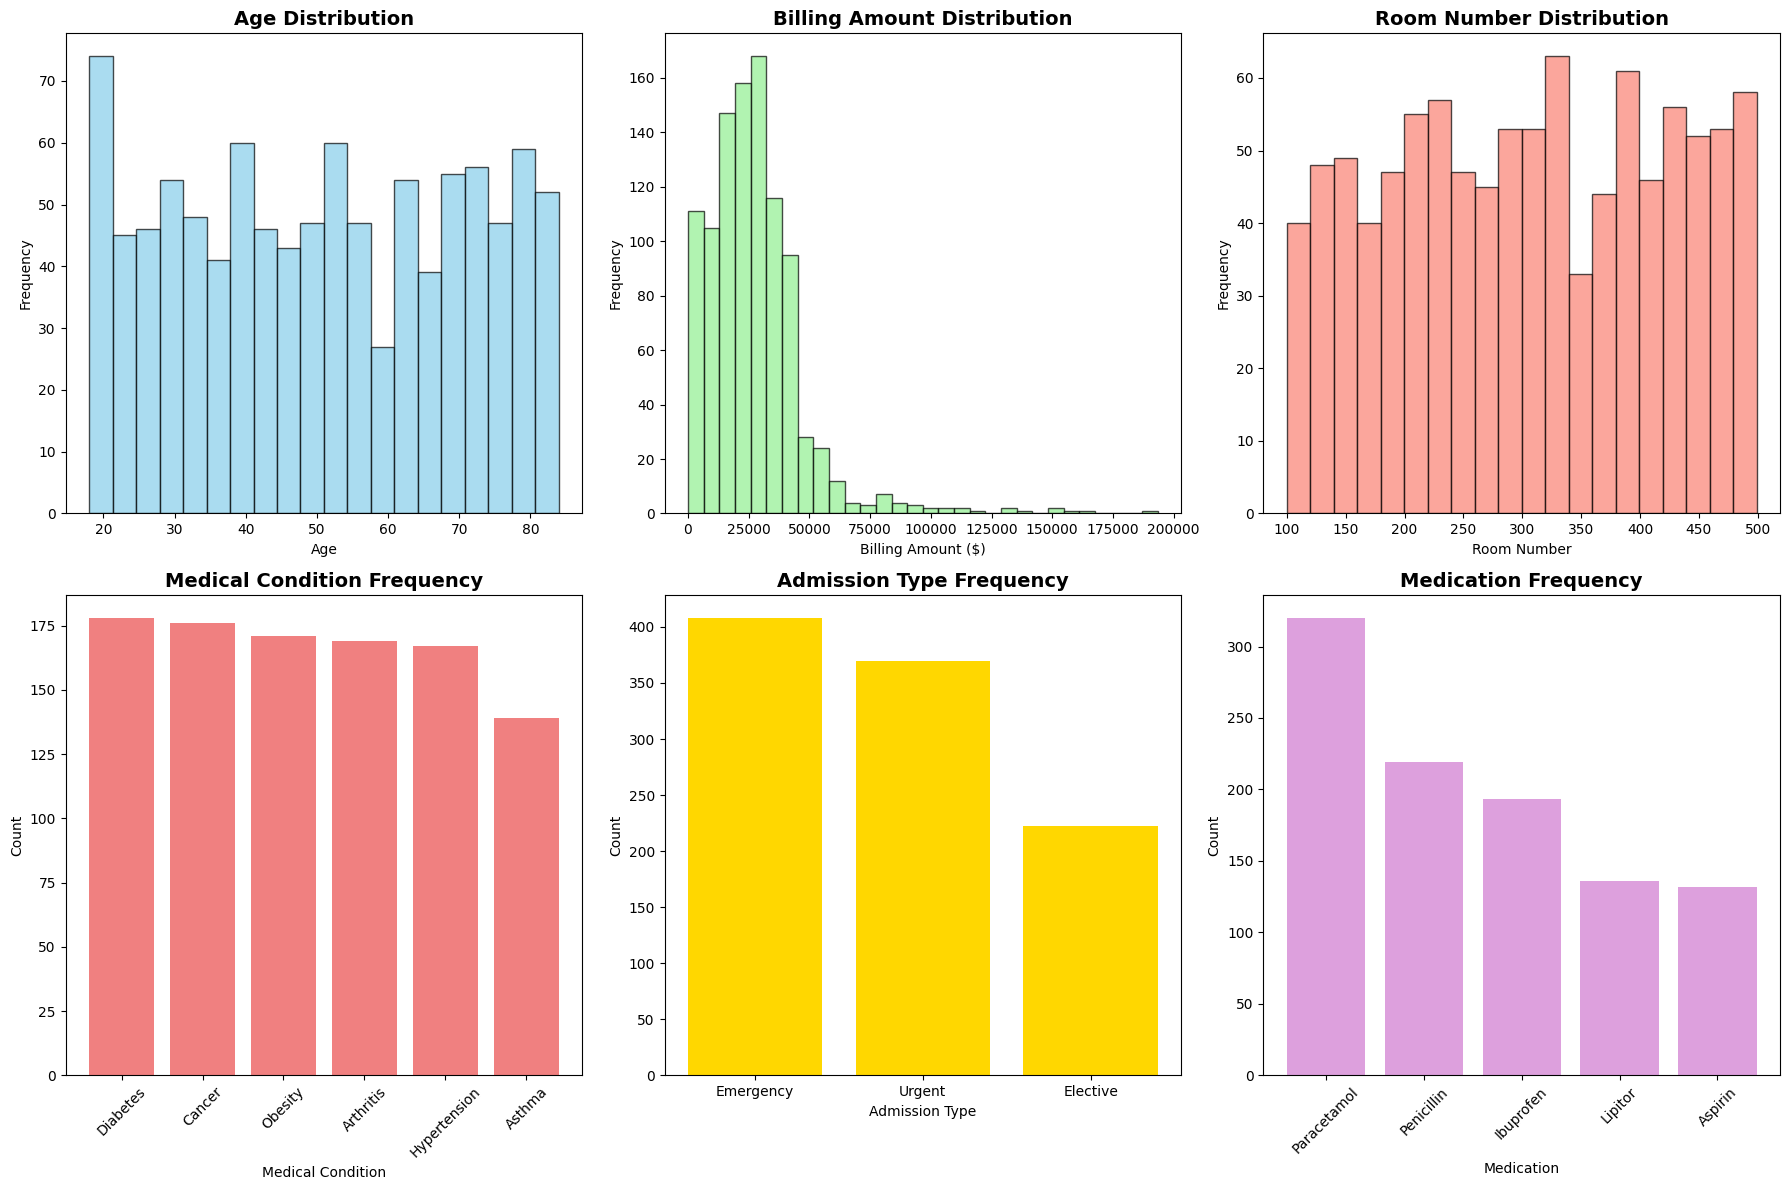


Summary Statistics:
Age - Mean: 50.7, Std: 19.8
Billing Amount - Mean: $27242.19, Std: $20722.70
Room Number - Mean: 305.6, Std: 115.3


In [ ]:
# Task 1 — EDA Visualization
print("="*50)
print("TASK 1 - EXPLORATORY DATA ANALYSIS")
print("="*50)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Age Distribution
axes[0,0].hist(df['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0,0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')

# 2. Billing Amount Distribution
axes[0,1].hist(df['Billing_Amount'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0,1].set_title('Billing Amount Distribution', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Billing Amount ($)')
axes[0,1].set_ylabel('Frequency')

# 3. Room Number Distribution
axes[0,2].hist(df['Room_Number'], bins=20, color='salmon', edgecolor='black', alpha=0.7)
axes[0,2].set_title('Room Number Distribution', fontsize=14, fontweight='bold')
axes[0,2].set_xlabel('Room Number')
axes[0,2].set_ylabel('Frequency')

# 4. Medical Condition Frequency
condition_counts = df['Medical_Condition'].value_counts()
axes[1,0].bar(condition_counts.index, condition_counts.values, color='lightcoral')
axes[1,0].set_title('Medical Condition Frequency', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Medical Condition')
axes[1,0].set_ylabel('Count')
plt.setp(axes[1,0].xaxis.get_majorticklabels(), rotation=45)

# 5. Admission Type Frequency
admission_counts = df['Admission_Type'].value_counts()
axes[1,1].bar(admission_counts.index, admission_counts.values, color='gold')
axes[1,1].set_title('Admission Type Frequency', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Admission Type')
axes[1,1].set_ylabel('Count')

# 6. Medication Frequency
medication_counts = df['Medication'].value_counts()
axes[1,2].bar(medication_counts.index, medication_counts.values, color='plum')
axes[1,2].set_title('Medication Frequency', fontsize=14, fontweight='bold')
axes[1,2].set_xlabel('Medication')
axes[1,2].set_ylabel('Count')
plt.setp(axes[1,2].xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(f"Age - Mean: {df['Age'].mean():.1f}, Std: {df['Age'].std():.1f}")
print(f"Billing Amount - Mean: ${df['Billing_Amount'].mean():.2f}, Std: ${df['Billing_Amount'].std():.2f}")
print(f"Room Number - Mean: {df['Room_Number'].mean():.1f}, Std: {df['Room_Number'].std():.1f}")

In [ ]:
# Task 2 — Supervised Learning (Complete with all variable definitions)
print("\n" + "="*50)
print("TASK 2 - SUPERVISED LEARNING")
print("="*50)

def prepare_features(df):
    le_condition = LabelEncoder()
    le_admission = LabelEncoder()
    le_medication = LabelEncoder()

    df_encoded = df.copy()
    df_encoded['Medical_Condition_Encoded'] = le_condition.fit_transform(df['Medical_Condition'])
    df_encoded['Admission_Type_Encoded'] = le_admission.fit_transform(df['Admission_Type'])
    df_encoded['Medication_Encoded'] = le_medication.fit_transform(df['Medication'])

    features = ['Age', 'Medical_Condition_Encoded', 'Admission_Type_Encoded',
               'Medication_Encoded', 'Billing_Amount', 'Room_Number']

    X = df_encoded[features]
    y = df_encoded['Test_Results']

    return X, y, le_condition, le_admission, le_medication

X, y, le_condition, le_admission, le_medication = prepare_features(df)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.3f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


TASK 2 - SUPERVISED LEARNING
Training set size: 800
Testing set size: 200

Model Accuracy: 0.345

Classification Report:
              precision    recall  f1-score   support

    Abnormal       0.35      0.38      0.36        74
Inconclusive       0.23      0.11      0.15        46
      Normal       0.37      0.45      0.40        80

    accuracy                           0.34       200
   macro avg       0.31      0.31      0.31       200
weighted avg       0.33      0.34      0.33       200


Feature Importance:
                     feature  importance
4             Billing_Amount    0.267546
5                Room_Number    0.258731
0                        Age    0.216492
1  Medical_Condition_Encoded    0.102721
3         Medication_Encoded    0.092870
2     Admission_Type_Encoded    0.061640


In [ ]:
# Task 3 — Unsupervised Learning: Anomaly Detection
print("\n" + "="*50)
print("TASK 3 - UNSUPERVISED LEARNING: ANOMALY DETECTION")
print("="*50)

billing_data = df[['Billing_Amount', 'Age', 'Room_Number']].copy()# Prepare data for anomaly detection


iso_forest = IsolationForest(contamination=0.05, random_state=42)# Apply Isolation Forest for anomaly detection
anomaly_predictions = iso_forest.fit_predict(billing_data)

df['Is_Anomaly'] = anomaly_predictions
df['Is_Anomaly'] = df['Is_Anomaly'].map({1: 'Normal', -1: 'Anomaly'})# Add anomaly labels to dataframe


anomaly_count = (df['Is_Anomaly'] == 'Anomaly').sum()
total_count = len(df)
print(f"Anomalies detected: {anomaly_count} out of {total_count} ({anomaly_count/total_count*100:.1f}%)")

anomalies = df[df['Is_Anomaly'] == 'Anomaly']
normal_cases = df[df['Is_Anomaly'] == 'Normal']

print(f"\nAverage Billing Amount - Normal cases: ${normal_cases['Billing_Amount'].mean():.2f}")
print(f"Average Billing Amount - Anomalies: ${anomalies['Billing_Amount'].mean():.2f}")

high_anomalies = anomalies[anomalies['Billing_Amount'] > normal_cases['Billing_Amount'].quantile(0.95)]
low_anomalies = anomalies[anomalies['Billing_Amount'] < normal_cases['Billing_Amount'].quantile(0.05)]

print(f"\nHigh-cost anomalies (unusually expensive): {len(high_anomalies)} cases")
print(f"Low-cost anomalies (suspiciously cheap): {len(low_anomalies)} cases")

print(f"\nTop 5 High-Cost Anomalies:")
high_anomalies_display = high_anomalies.nlargest(5, 'Billing_Amount')[['Age', 'Medical_Condition', 'Admission_Type', 'Billing_Amount']]
print(high_anomalies_display.to_string(index=False))

print(f"\nTop 5 Low-Cost Anomalies:")
low_anomalies_display = low_anomalies.nsmallest(5, 'Billing_Amount')[['Age', 'Medical_Condition', 'Admission_Type', 'Billing_Amount']]
print(low_anomalies_display.to_string(index=False))


TASK 3 - UNSUPERVISED LEARNING: ANOMALY DETECTION
Anomalies detected: 50 out of 1000 (5.0%)

Average Billing Amount - Normal cases: $24606.79
Average Billing Amount - Anomalies: $77314.83

High-cost anomalies (unusually expensive): 38 cases
Low-cost anomalies (suspiciously cheap): 5 cases

Top 5 High-Cost Anomalies:
 Age Medical_Condition Admission_Type  Billing_Amount
  18            Cancer         Urgent   193414.818244
  82            Asthma       Elective   163139.464577
  21         Arthritis      Emergency   161024.808283
  63            Cancer      Emergency   153631.936187
  84           Obesity       Elective   150194.627188

Top 5 Low-Cost Anomalies:
 Age Medical_Condition Admission_Type  Billing_Amount
  83            Asthma      Emergency        2.036382
  83            Cancer         Urgent      906.433488
  20            Asthma      Emergency      943.719165
  23         Arthritis       Elective     1437.819503
  25            Asthma         Urgent     2302.918373


In [ ]:
# Task 4 — AI Doctor Recommendation Generator
print("\n" + "="*50)
print("TASK 4 - AI DOCTOR RECOMMENDATION GENERATOR")
print("="*50)

class AIDoctorRecommender:
    def __init__(self):
        self.condition_advice = {
            'Hypertension': {
                'Normal': "Continue current management. Maintain healthy lifestyle with regular exercise and low-sodium diet.",
                'Abnormal': "Consider medication adjustment. Increase monitoring frequency. Evaluate for secondary causes.",
                'Inconclusive': "Repeat testing in 2-4 weeks. Continue current regimen with close monitoring."
            },
            'Diabetes': {
                'Normal': "Good control maintained. Continue current medication and dietary management.",
                'Abnormal': "Review medication regimen. Consider insulin adjustment or additional oral agents.",
                'Inconclusive': "Repeat HbA1c in 3 months. Continue glucose monitoring and current treatment."
            },
            'Asthma': {
                'Normal': "Good asthma control. Continue maintenance inhaler as prescribed.",
                'Abnormal': "Consider step-up therapy. Review inhaler technique. Assess for triggers.",
                'Inconclusive': "Repeat spirometry in 1 month. Continue current controller medication."
            },
            'Cancer': {
                'Normal': "Stable condition. Continue surveillance as per oncology schedule.",
                'Abnormal': "Urgent oncology consultation needed. Consider imaging and biopsy.",
                'Inconclusive': "Repeat imaging in 1-3 months. Close monitoring with oncology team."
            },
            'Arthritis': {
                'Normal': "Good symptom control. Continue current anti-inflammatory regimen.",
                'Abnormal': "Consider medication adjustment. Physical therapy referral. Pain management consult.",
                'Inconclusive': "Repeat inflammatory markers in 1 month. Continue current treatment."
            },
            'Obesity': {
                'Normal': "Continue weight management program. Maintain current progress.",
                'Abnormal': "Intensify dietary intervention. Consider pharmacotherapy options.",
                'Inconclusive': "Repeat metabolic panel in 3 months. Continue lifestyle modifications."
            }
        }

    def generate_recommendation(self, age, condition, medication, test_result):
        base_advice = self.condition_advice.get(condition, {}).get(test_result, "Consult with specialist for personalized advice.")

        recommendation = f"""
PATIENT HEALTH ADVISORY
{'='*50}

PATIENT PROFILE:
• Age: {age}
• Condition: {condition}
• Current Medication: {medication}
• Test Result: {test_result}

MEDICAL RECOMMENDATIONS:
1. PRIMARY MANAGEMENT: {base_advice}

2. MEDICATION PLAN:
   - Continue {medication} as prescribed
   - Monitor for side effects
   - Schedule medication review in 4-6 weeks

3. LIFESTYLE RECOMMENDATIONS:
   - Regular physical activity (30 mins, 5 days/week)
   - Balanced nutrition with condition-appropriate diet
   - Stress management techniques
   - Adequate sleep (7-8 hours nightly)

4. FOLLOW-UP SCHEDULE:
   - Primary care follow-up: 4-6 weeks
   - Specialist consultation if {test_result} result persists
   - Repeat testing as clinically indicated

5. WARNING SIGNS - SEEK IMMEDIATE CARE FOR:
   - Worsening symptoms
   - New concerning symptoms
   - Medication intolerance

This AI-generated advice should be reviewed with your healthcare provider for personalized medical care.

Dr. AI Health Advisor
        """
        return recommendation

ai_doctor = AIDoctorRecommender()

sample_age = 45
sample_condition = "Hypertension"
sample_medication = "Lipitor"
sample_test_result = "Abnormal"

print("SAMPLE AI DOCTOR RECOMMENDATION:")
print(ai_doctor.generate_recommendation(sample_age, sample_condition, sample_medication, sample_test_result))


TASK 4 - AI DOCTOR RECOMMENDATION GENERATOR
SAMPLE AI DOCTOR RECOMMENDATION:

PATIENT HEALTH ADVISORY

PATIENT PROFILE:
• Age: 45
• Condition: Hypertension
• Current Medication: Lipitor
• Test Result: Abnormal

MEDICAL RECOMMENDATIONS:
1. PRIMARY MANAGEMENT: Consider medication adjustment. Increase monitoring frequency. Evaluate for secondary causes.

2. MEDICATION PLAN:
   - Continue Lipitor as prescribed
   - Monitor for side effects
   - Schedule medication review in 4-6 weeks

3. LIFESTYLE RECOMMENDATIONS:
   - Regular physical activity (30 mins, 5 days/week)
   - Balanced nutrition with condition-appropriate diet
   - Stress management techniques
   - Adequate sleep (7-8 hours nightly)

4. FOLLOW-UP SCHEDULE:
   - Primary care follow-up: 4-6 weeks
   - Specialist consultation if Abnormal result persists
   - Repeat testing as clinically indicated

5. WARNING SIGNS - SEEK IMMEDIATE CARE FOR:
   - Worsening symptoms
   - New concerning symptoms
   - Medication intolerance

This AI-